In [2]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
1 + 1

2

In [4]:
# imPath = "/Users/kidio/git/motionscloud/CracksDetection/upload/cropped_broken_nexus6.jpg"
imPath = "/Volumes/Data/Dropbox (Personal)/Screenshots/Screenshot 2017-04-14 14.23.12.png"

In [5]:
im = cv2.imread(imPath)

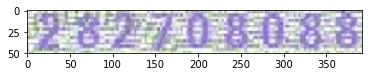

In [6]:
plt.imshow(im)

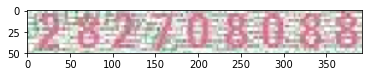

In [7]:
gray = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(gray)

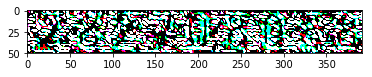

In [8]:
kSize = 3
gray2 = cv2.GaussianBlur(gray, (kSize, kSize), 0)

# find  Gradient Magnitude of the images using Sobel mask
grad_x = cv2.Sobel(gray2, cv2.CV_32F, 1, 0, -1)
grad_y = cv2.Sobel(gray2, cv2.CV_32F, 0, 1, -1)

grad = cv2.subtract(grad_x, grad_y)
grad = cv2.convertScaleAbs(grad)
blurred = cv2.blur(grad, (3, 3))
(_, thresh) = cv2.threshold(grad, 255 * 0.3, 255 , cv2.THRESH_BINARY)
plt.imshow(thresh)

In [9]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    #
(cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL,
                                 cv2.CHAIN_APPROX_SIMPLE)
c = sorted(cnts, key=cv2.contourArea, reverse=True)[0]

    # compute the rotated bounding box of the largest contour
    # rect = cv2.minAreaRect(c)
    # box = np.int0(cv2.cv.BoxPoints(rect))


box = cv2.convexHull(c)
box

error: /Users/jhelmus/anaconda/conda-bld/work/opencv-2.4.8/modules/imgproc/src/contours.cpp:196: error: (-210) [Start]FindContours support only 8uC1 and 32sC1 images in function cvStartFindContours


In [ ]:
a = np.random.random ((5,5))

In [ ]:
a[1,3] = 0
a[2:4,1:3] = 0
a

In [ ]:
np.sum(im[im>0])

In [ ]:
np.sum(a)

In [ ]:
# thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)

In [ ]:
np.sum(thresh)/255

In [ ]:
440 *256

In [ ]:
42332 / 112640.0

In [ ]:
plt.imshow(thresh)

In [ ]:
np.count_nonzero(thresh)

In [ ]:
0.1 * 126996 / 440  /256

In [ ]:
np.mean(thresh)

In [ ]:
1- (np.sum(thresh) / np.mean(thresh) / 440  /256)

In [ ]:
np.sum(thresh) - np.sum(thresh[thresh > 0])

In [ ]:
thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)
x,y = thresh.shape 
np.mean(thresh) * 126996 - x * y

In [ ]:
thresh[0,0]

In [ ]:
np.sum(thresh)

In [ ]:
np.sum(thresh[thresh > 200]) / 255

In [ ]:
x , y = thresh.shape
x * y

In [ ]:
1.0 *  42332 / 112640

In [ ]:
np.sum(thresh)

In [ ]:
image = im

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 5, 5)
edged = cv2.Canny(gray, 30, 200)

plt.imshow(gray)

In [ ]:
frame = im 
# Convert BGR to HSV
# hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
# define range of blue color in HSV
lower_blue = np.array([17, 15, 100])
upper_blue = np.array([50, 56, 255])
# Threshold the HSV image to get only blue colors
mask = cv2.inRange(frame, lower_blue, upper_blue)
# Bitwise-AND mask and original image
res = cv2.bitwise_and(frame,frame, mask= mask)

plt.imshow(frame)
# plt.imshow(mask)
# plt.imshow(res)

In [ ]:
img = im
img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# lower mask (0-10)
lower_red = np.array([0,0,0])
upper_red = np.array([180, 255, 30])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([0,40,40])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

# join my masks
mask = mask0+mask1

# set my output img to zero everywhere except my mask
output_img = img.copy()
# output_img[np.where(mask==0)] = 0
output_img = cv2.bitwise_and(output_img, output_img, mask= mask1) 

x, y, _ = output_img.shape

new_mask = np.zeros(output_img.shape, np.uint8)

output_img = cv2.cvtColor(output_img, cv2.COLOR_BGR2GRAY)

new_mask[:] = [255,255,255]
new_mask = cv2.cvtColor(new_mask, cv2.COLOR_BGR2GRAY)
print new_mask[1,2]
abc = cv2.bitwise_not(output_img, output_img, mask=new_mask)

# plt.imshow(cv2.cvtColor(abc, cv2.COLOR_BGR2GRAY))

x, y  = abc.shape
for i in range(x-1):
    for j in range(y-1):
        if abc[i,j] < 80:
            abc[i,j] = 255
            
kernel = np.ones((2,2),np.uint8)
# abc = cv2.morphologyEx(abc, cv2.MORPH_OPEN, kernel)
abc = cv2.dilate(abc,kernel,iterations = 1)

cv2.imwrite("/Users/kidio/final.jpg", abc)
plt.imshow(abc)

In [ ]:
equ = cv2.equalizeHist(img)

In [100]:
img = cv2.imread('/Volumes/Data/Dropbox (Personal)/Screenshots/digits/black.png')

In [101]:
img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [102]:
# cvInRangeS(imgHSV, cvScalar(0, 0, 0, 0), cvScalar(180, 255, 30, 0), imgThreshold);

In [103]:
lower_black = np.array([0, 0, 200])
upper_black = np.array([180, 255, 255])
mask2 = cv2.inRange(img_hsv, lower_black, upper_black)

In [104]:
# set my output img to zero everywhere except my mask
output_img = img.copy()
# output_img[np.where(mask==0)] = 0
output_img = cv2.bitwise_or(output_img, output_img, mask= mask2)

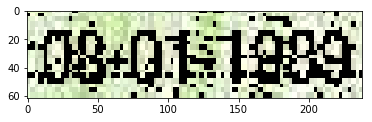

In [105]:
plt.imshow(output_img)

In [106]:
kernel = np.ones((5,5),np.uint8)
#output_img = cv2.morphologyEx(output_img, cv2.MORPH_OPEN, kernel)
output_img = cv2.dilate(output_img,kernel,iterations = 1)

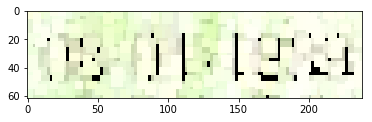

In [107]:
plt.imshow(output_img)

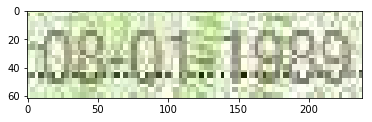

In [90]:
plt.imshow(img)